# Unemployment - Analysis and Visualization

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [66]:
# Change the default size of the Matplotlib graphs to 9x7 inches
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

In [2]:
# Store file path in variable
happiness_unemployment_file = "Resources/happiness_unemployment_yearly.csv"

# Read Data files with the pandas library
happiness_unemployment_df = pd.read_csv(happiness_unemployment_file,\
                                        encoding="UTF-8")
happiness_unemployment_df.head()

,Country,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Happiness Score_2019,Avg Happiness,Unemp. Rate_2015,Unemp. Rate_2016,Unemp. Rate_2017,Unemp. Rate_2018,Unemp. Rate_2019,Avg. Unemployment
0,Switzerland,7.587,7.509,7.494,7.487,7.480,7.5114,3.178,3.323,3.088,2.547,2.306,2.8884
1,Iceland,7.561,7.501,7.504,7.495,7.494,7.5110,3.992,3.008,2.825,2.742,3.550,3.2234
2,Denmark,7.527,7.526,7.522,7.555,7.600,7.5460,6.283,6.000,5.808,5.117,5.042,5.6500
3,Norway,7.522,7.498,7.537,7.594,7.554,7.5410,4.531,4.740,4.216,3.854,3.728,4.2138
4,Canada,7.427,7.404,7.316,7.328,7.278,7.3506,6.900,6.992,6.342,5.833,5.667,6.3468


### Check for Outliers in Average Happiness Scores and Average Unemployment Rate
* If found, create visuals to display outliers

In [3]:
# Check for outliers in Avg. Happiness Data
# Create a variable to hold avg. happiness data
happiness_data = happiness_unemployment_df['Avg Happiness']

# add subset 
quartiles = happiness_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Create a variable to hold data for potential outliers
outlier_happiness_data = happiness_data.loc[(happiness_data < lower_bound) |\
                                            (happiness_data > upper_bound)]
print(outlier_happiness_data)

Series([], Name: Avg Happiness, dtype: float64)


In [4]:
# Check for outliers in Avg. Unemployment Data
# Create a variable to hold avg. unemployment data
unemployment_data = happiness_unemployment_df['Avg. Unemployment']

# add subset 
quartiles = unemployment_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Create a variable to hold data for potential outliers
outlier_unemployment_data = unemployment_data.loc[(unemployment_data < \
                                                   lower_bound) | \
                                                  (unemployment_data > \
                                                   upper_bound)]
print(outlier_unemployment_data)

31    17.6556
54    29.2400
71    21.5400
74    21.3050
79    27.0700
80    19.3600
Name: Avg. Unemployment, dtype: float64


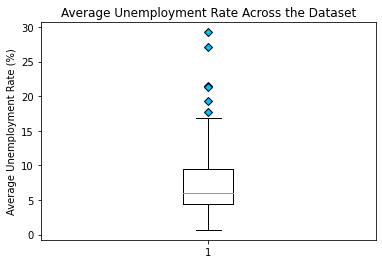

In [5]:
# Create a Box and Whisker plot to display potential outliers in average unemployment rates
blue_diamond = dict(markerfacecolor='deepskyblue', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Average Unemployment Rate Across the Dataset')
ax1.set_ylabel('Average Unemployment Rate (%)')
ax1.boxplot(happiness_unemployment_df['Avg. Unemployment'], \
            flierprops = blue_diamond)
plt.show()

### Pull happiness scores and unemployment information for potential outliers

In [6]:
# Convert outlier information to dataframe
outlier_unemployment_data_df = pd.DataFrame(outlier_unemployment_data)
outlier_unemployment_data_df

,Avg. Unemployment
31,17.6556
54,29.2400
71,21.5400
74,21.3050
79,27.0700
80,19.3600


In [7]:
# Determine columns that are only in one DataFrame and use this to select a subset of columns in the merge
cols_to_use = happiness_unemployment_df.columns.difference\
(outlier_unemployment_data_df.columns)

In [8]:
# Merge DataFrames to get information for countries with unemployment rates that are potential outliers
outlier_info_df = outlier_unemployment_data_df.merge(happiness_unemployment_df[cols_to_use],\
                                                     how = 'inner', left_index = True, right_index = True)
outlier_info_df

,Avg. Unemployment,Avg Happiness,Country,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Happiness Score_2019,Unemp. Rate_2015,Unemp. Rate_2016,Unemp. Rate_2017,Unemp. Rate_2018,Unemp. Rate_2019
31,17.6556,6.3514,Spain,6.329,6.361,6.403,6.310,6.354,22.058,19.635,17.225,15.255,14.105
54,29.2400,5.6062,Kosovo,5.589,5.401,5.279,5.662,6.100,32.900,27.500,30.500,29.600,25.700
71,21.5400,5.1618,Bosnia and Herzegovina,4.949,5.163,5.182,5.129,5.386,27.700,25.400,20.500,18.400,15.700
74,21.3050,5.1524,Greece,4.857,5.033,5.227,5.358,5.287,24.900,23.550,21.450,19.300,17.325
79,27.0700,4.6752,South Africa,4.642,4.459,4.829,4.724,4.722,25.350,26.725,27.450,27.125,28.700
80,19.3600,4.3932,Armenia,4.350,4.360,4.376,4.321,4.559,18.500,18.000,20.900,20.500,18.900


### Create a new DataFrame that does not contain any potential outliers

In [9]:
# Create a DataFrame that contains records from both DataFrames
merged_df = happiness_unemployment_df.merge(outlier_unemployment_data_df, how = 'outer',\
                                            left_index = True, right_index = True, \
                                            indicator = True, suffixes=(None, '_y'))

# Create a DataFrame that only contains information contained in the left 
# DataFrame (happiness_unemployment_df)
# This only returns records that are not potential outliers
happ_unemp_updated_df = merged_df[merged_df['_merge']=='left_only']

# Remove additional columns that would not be used for later analysis
happ_unemp_updated_df.drop(columns = ['Avg. Unemployment_y', '_merge'], inplace = True)
happ_unemp_updated_df.head()

C:\Users\bisma\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Happiness Score_2019,Avg Happiness,Unemp. Rate_2015,Unemp. Rate_2016,Unemp. Rate_2017,Unemp. Rate_2018,Unemp. Rate_2019,Avg. Unemployment
0,Switzerland,7.587,7.509,7.494,7.487,7.480,7.5114,3.178,3.323,3.088,2.547,2.306,2.8884
1,Iceland,7.561,7.501,7.504,7.495,7.494,7.5110,3.992,3.008,2.825,2.742,3.550,3.2234
2,Denmark,7.527,7.526,7.522,7.555,7.600,7.5460,6.283,6.000,5.808,5.117,5.042,5.6500
3,Norway,7.522,7.498,7.537,7.594,7.554,7.5410,4.531,4.740,4.216,3.854,3.728,4.2138
4,Canada,7.427,7.404,7.316,7.328,7.278,7.3506,6.900,6.992,6.342,5.833,5.667,6.3468


## Create Visuals to study potential trends in Unemployment Rate and Happiness scores
### Linear Regression Model to demonstrate correlation between Unemployment Rate and Happiness scores

The correlation between both factors is -0.36


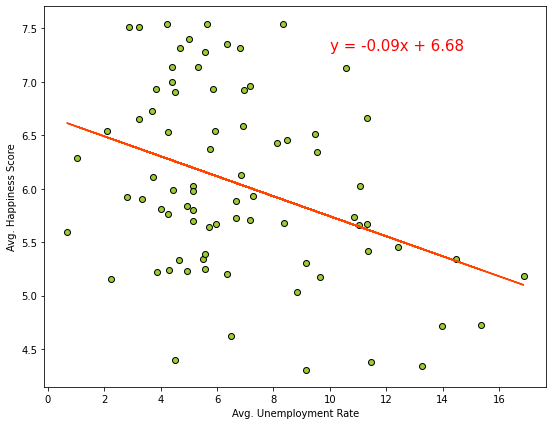

In [122]:
# Declare x_values and y_values
x_values = happ_unemp_updated_df['Avg. Unemployment']
y_values = happ_unemp_updated_df['Avg Happiness']

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "yellowgreen", edgecolor = "black")
plt.plot(x_values,regress_values,"orangered")

# Label plot
plt.annotate(line_eq,(10,7.3),fontsize=15,color="red")
plt.xlabel('Avg. Unemployment Rate')
plt.ylabel('Avg. Happiness Score')
plt.show()

## Study Changes in Umployment Rates over Time
### Changes in Unemployment Rate  and Happiness Scores (Random Sample = 5 Countries)
This analysis will select 5 countries on random from the 85 countries that are in both the Unemployment and Happiness datasets. The idea being that visualizing trends over time will display any obvious connections between the two factors.
* Select a random sample of 5 countries
* Create a DataFrame containing the Happiness Scores over time for these countries
* Create a DataFrame containing the Happiness Scores over time for these countries

In [92]:
# Select a random sample of 5 countries
sample_df = happiness_unemployment_df.sample(5)
sample_df.set_index('Country', inplace = True)
sample_df

,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Happiness Score_2019,Avg Happiness,Unemp. Rate_2015,Unemp. Rate_2016,Unemp. Rate_2017,Unemp. Rate_2018,Unemp. Rate_2019,Avg. Unemployment
Country,,,,,,,,,,,,
Bolivia,5.890,5.822,5.823,5.752,5.779,5.8132,4.000,4.000,4.000,4.000,4.000,4.0000
Slovenia,5.848,5.768,5.758,5.948,6.118,5.8880,8.992,8.008,6.575,5.125,4.600,6.6600
Lithuania,5.833,5.813,5.902,5.952,6.149,5.9298,9.119,7.861,7.073,6.146,6.254,7.2906
Honduras,4.788,4.871,5.181,5.504,5.860,5.2408,4.592,4.668,4.048,4.076,4.109,4.2986
Belarus,5.813,5.802,5.569,5.483,5.323,5.5980,0.912,1.017,0.768,0.428,0.295,0.6840


In [93]:
# Create a df that only contains happiness records for countries in the sample
# Set the 'Country' as the index
happiness_df = sample_df.iloc[:, :5]
happiness_df

,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Happiness Score_2019
Country,,,,,
Bolivia,5.890,5.822,5.823,5.752,5.779
Slovenia,5.848,5.768,5.758,5.948,6.118
Lithuania,5.833,5.813,5.902,5.952,6.149
Honduras,4.788,4.871,5.181,5.504,5.860
Belarus,5.813,5.802,5.569,5.483,5.323


In [106]:
# Create a df that only contains unemployment records for contries that are in both the original happiness and unemployment dfs
# Set the 'Country' as the index
unemployment_df = sample_df.iloc[:, 6:11]
unemployment_df

,Unemp. Rate_2015,Unemp. Rate_2016,Unemp. Rate_2017,Unemp. Rate_2018,Unemp. Rate_2019
Country,,,,,
Bolivia,4.000,4.000,4.000,4.000,4.000
Slovenia,8.992,8.008,6.575,5.125,4.600
Lithuania,9.119,7.861,7.073,6.146,6.254
Honduras,4.592,4.668,4.048,4.076,4.109
Belarus,0.912,1.017,0.768,0.428,0.295


#### Create Visual for Happiness Trends over time for countries in Sample
* Restructure the happiness DataFrame such that the countries are the column titles and the years are the rows
* Create a line graph that shows each countries happiness score over time

In [151]:
# Create variables for names of different countries in the sample
country_1_sample_name = happiness_df.index[0]
country_2_sample_name = happiness_df.index[1]
country_3_sample_name = happiness_df.index[2]
country_4_sample_name = happiness_df.index[3]
country_5_sample_name = happiness_df.index[4]

In [124]:
# Create variables holding numpy arrays of different rows of the happiness_df
country_1_hap_info = happiness_df.iloc[0].values
country_2_hap_info = happiness_df.iloc[1].values
country_3_hap_info = happiness_df.iloc[2].values
country_4_hap_info = happiness_df.iloc[3].values
country_5_hap_info = happiness_df.iloc[4].values

In [125]:
# Create a DataFrame to display Happiness Scores over time for sample countries
year = ['2015', '2016', '2017', '2018', '2019']
sample_happiness_df = pd.DataFrame({country_1_sample_name: country_1_info,\
                                        country_2_sample_name: country_2_hap_info,\
                                        country_3_sample_name: country_3_hap_info,\
                                        country_4_sample_name: country_4_hap_info,\
                                       country_5_sample_name: country_5_hap_info,\
                                        "Year":year})
sample_happiness_df.set_index("Year", inplace = True)
sample_happiness_df

,Bolivia,Slovenia,Lithuania,Honduras,Belarus
Year,,,,,
2015,4.0,5.848,5.833,4.788,5.813
2016,4.0,5.768,5.813,4.871,5.802
2017,4.0,5.758,5.902,5.181,5.569
2018,4.0,5.948,5.952,5.504,5.483
2019,4.0,6.118,6.149,5.860,5.323


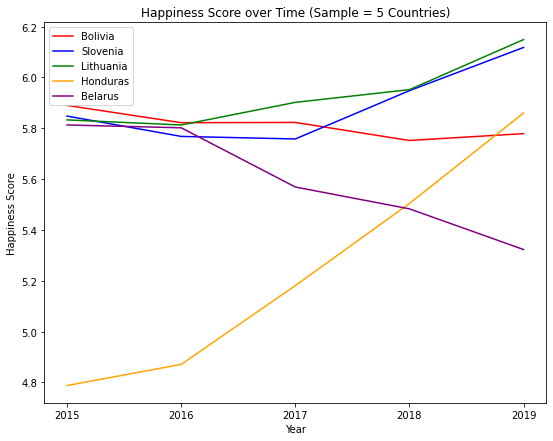

In [126]:
# Add labels to X and Y axes :: Add title
plt.title("Happiness Score over Time (Sample = 5 Countries)")
plt.xlabel("Year")
plt.ylabel("Happiness Score")

# Plot the charts and apply some styling
country_hap_1, = plt.plot(year, country_1_hap_info, color="red", label= country_1_sample_name)
country_hap_2, = plt.plot(year, country_2_hap_info, color="blue", label= country_2_sample_name)
country_hap_3, = plt.plot(year, country_3_hap_info, color="green", label= country_3_sample_name)
country_hap_4, = plt.plot(year, country_4_hap_info, color="orange", label= country_4_sample_name)
country_hap_5, = plt.plot(year, country_5_hap_info, color="darkviolet", label= country_5_sample_name)

# Create a legend for the chart
plt.legend(handles=[country_hap_1, country_hap_2, country_hap_3, country_hap_4,\
                    country_hap_5], loc="best")

#### Create Visual for Unemployment Trends over time for countries in Sample
* Restructure the unemployment DataFrame such that the countries are the column titles and the years are the rows
* Create a line graph that shows each countries unemployment rate over time

In [152]:
# Create variables holding numpy arrays of different rows of the sample_happiness_df
country_1_unemp_info = unemployment_df.iloc[0].values
country_2_unemp_info = unemployment_df.iloc[1].values
country_3_unemp_info = unemployment_df.iloc[2].values
country_4_unemp_info = unemployment_df.iloc[3].values
country_5_unemp_info = unemployment_df.iloc[4].values

In [153]:
# Create a DataFrame to display Happiness Scores over time for sample countries
year = ['2015', '2016', '2017', '2018', '2019']
sample_unemployment_df = pd.DataFrame({country_1_sample_name: country_1_unemp_info,\
                                        country_2_sample_name: country_2_unemp_info,\
                                        country_3_sample_name: country_3_unemp_info,\
                                        country_4_sample_name: country_4_unemp_info,\
                                       country_5_sample_name: country_5_unemp_info,\
                                        "Year":year})
sample_unemployment_df.set_index("Year", inplace = True)
sample_unemployment_df

,Bolivia,Slovenia,Lithuania,Honduras,Belarus
Year,,,,,
2015,4.0,8.992,9.119,4.592,0.912
2016,4.0,8.008,7.861,4.668,1.017
2017,4.0,6.575,7.073,4.048,0.768
2018,4.0,5.125,6.146,4.076,0.428
2019,4.0,4.600,6.254,4.109,0.295


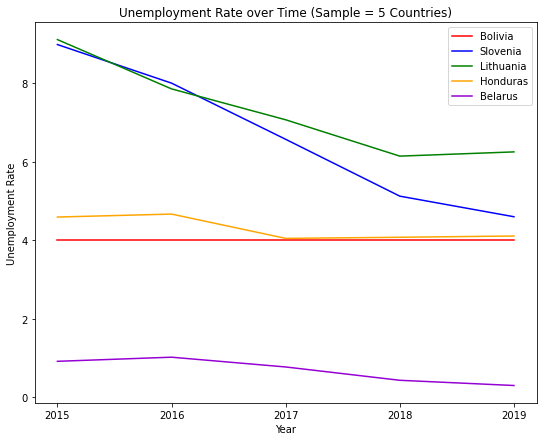

In [154]:
# Add labels to X and Y axes :: Add title
plt.title("Unemployment Rate over Time (Sample = 5 Countries)")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate")

# Plot the charts and apply some styling
country_unemp_1, = plt.plot(year, country_1_unemp_info, color="red", label= country_1_sample_name)
country_unemp_2, = plt.plot(year, country_2_unemp_info, color="blue", label= country_2_sample_name)
country_unemp_3, = plt.plot(year, country_3_unemp_info, color="green", label= country_3_sample_name)
country_unemp_4, = plt.plot(year, country_4_unemp_info, color="orange", label= country_4_sample_name)
country_unemp_5, = plt.plot(year, country_5_unemp_info, color="darkviolet", label= country_5_sample_name)

# Create a legend for the chart
plt.legend(handles=[country_unemp_1, country_unemp_2, country_unemp_3, country_unemp_4,\
                    country_unemp_5], loc="best")

### Changes in Unemployment Rate (Top 10 Countries with Highest Avg. Happiness Scores)
This analysis will focus on changes in unemployment rates for countries with the highest average happiness scores in the dataset. (This graph is meant to complement the happiness graph that looks at the changes in happiness scores for these countries.)
The idea is that this will help display any obvious connections between changes in unemployment rates that may have played a role in changes in happiness scores. 
* The countries with the lowest 10 average happiness scores did not have accurate unemployment data that was easily accessible. Therefore, there is no visual analysis of possible effects of unemployment changes on happiness in these countries. 


In [131]:
# Pull in average happiness data
top_happiness_file = "../Happiness/Resources/happiness_top10.csv"
top_happiness_df = pd.read_csv(top_happiness_file, encoding = "UTF-8")
top_happiness_df.head()

,Country,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Happiness Score_2019
0,Denmark,7.527,7.526,7.522,7.555,7.600
1,Norway,7.522,7.498,7.537,7.594,7.554
2,Finland,7.406,7.413,7.469,7.632,7.769
3,Switzerland,7.587,7.509,7.494,7.487,7.480
4,Iceland,7.561,7.501,7.504,7.495,7.494


In [132]:
# Merge DataFrames to get unemployment information for countries in happiness sample
top10_unemp_merged_df = top_happiness_df.merge(happ_unemp_updated_df, how = 'inner', \
                                                   on = 'Country')
top10_unemp_merged_df

,Country,Happiness Score_2015_x,Happiness Score_2016_x,Happiness Score_2017_x,Happiness Score_2018_x,Happiness Score_2019_x,Happiness Score_2015_y,Happiness Score_2016_y,Happiness Score_2017_y,Happiness Score_2018_y,Happiness Score_2019_y,Avg Happiness,Unemp. Rate_2015,Unemp. Rate_2016,Unemp. Rate_2017,Unemp. Rate_2018,Unemp. Rate_2019,Avg. Unemployment
0,Denmark,7.527,7.526,7.522,7.555,7.600,7.527,7.526,7.522,7.555,7.600,7.5460,6.283,6.000,5.808,5.117,5.042,5.6500
1,Norway,7.522,7.498,7.537,7.594,7.554,7.522,7.498,7.537,7.594,7.554,7.5410,4.531,4.740,4.216,3.854,3.728,4.2138
2,Finland,7.406,7.413,7.469,7.632,7.769,7.406,7.413,7.469,7.632,7.769,7.5378,9.575,8.975,8.825,7.425,6.833,8.3266
3,Switzerland,7.587,7.509,7.494,7.487,7.480,7.587,7.509,7.494,7.487,7.480,7.5114,3.178,3.323,3.088,2.547,2.306,2.8884
4,Iceland,7.561,7.501,7.504,7.495,7.494,7.561,7.501,7.504,7.495,7.494,7.5110,3.992,3.008,2.825,2.742,3.550,3.2234
5,Netherlands,7.378,7.339,7.377,7.441,7.488,7.378,7.339,7.377,7.441,7.488,7.4046,6.891,6.024,4.854,3.839,3.390,4.9996
6,Canada,7.427,7.404,7.316,7.328,7.278,7.427,7.404,7.316,7.328,7.278,7.3506,6.900,6.992,6.342,5.833,5.667,6.3468
7,Sweden,7.364,7.291,7.284,7.314,7.343,7.364,7.291,7.284,7.314,7.343,7.3192,7.400,6.950,6.683,6.325,6.767,6.8250
8,New Zealand,7.286,7.334,7.314,7.324,7.307,7.286,7.334,7.314,7.324,7.307,7.3130,5.350,5.100,4.725,4.275,4.075,4.7050
9,Australia,7.284,7.313,7.284,7.272,7.228,7.284,7.313,7.284,7.272,7.228,7.2762,6.050,5.700,5.583,5.292,5.158,5.5566


In [133]:
# Create new DataFrame to filter out unwanted columns
top10_unemp_info_df = top10_unemp_merged_df[['Country', 'Unemp. Rate_2015', 'Unemp. Rate_2016',\
                                            'Unemp. Rate_2017', 'Unemp. Rate_2018', 'Unemp. Rate_2019']]
top10_unemp_info_df.set_index('Country', inplace = True)
top10_unemp_info_df

,Unemp. Rate_2015,Unemp. Rate_2016,Unemp. Rate_2017,Unemp. Rate_2018,Unemp. Rate_2019
Country,,,,,
Denmark,6.283,6.000,5.808,5.117,5.042
Norway,4.531,4.740,4.216,3.854,3.728
Finland,9.575,8.975,8.825,7.425,6.833
Switzerland,3.178,3.323,3.088,2.547,2.306
Iceland,3.992,3.008,2.825,2.742,3.550
Netherlands,6.891,6.024,4.854,3.839,3.390
Canada,6.900,6.992,6.342,5.833,5.667
Sweden,7.400,6.950,6.683,6.325,6.767
New Zealand,5.350,5.100,4.725,4.275,4.075


In [134]:
# Create variables for names of different countries
country_1_name = top10_unemp_info_df.index[0]
country_2_name = top10_unemp_info_df.index[1]
country_3_name = top10_unemp_info_df.index[2]
country_4_name = top10_unemp_info_df.index[3]
country_5_name = top10_unemp_info_df.index[4]
country_6_name = top10_unemp_info_df.index[5]
country_7_name = top10_unemp_info_df.index[6]
country_8_name = top10_unemp_info_df.index[7]
country_9_name = top10_unemp_info_df.index[8]
country_10_name = top10_unemp_info_df.index[9]

In [135]:
# Create variables holding numpy arrays of different rows of the sample_happiness_df
country_1_info = top10_unemp_info_df.iloc[0].values
country_2_info = top10_unemp_info_df.iloc[1].values
country_3_info = top10_unemp_info_df.iloc[2].values
country_4_info = top10_unemp_info_df.iloc[3].values
country_5_info = top10_unemp_info_df.iloc[4].values
country_6_info = top10_unemp_info_df.iloc[5].values
country_7_info = top10_unemp_info_df.iloc[6].values
country_8_info = top10_unemp_info_df.iloc[7].values
country_9_info = top10_unemp_info_df.iloc[8].values
country_10_info = top10_unemp_info_df.iloc[9].values

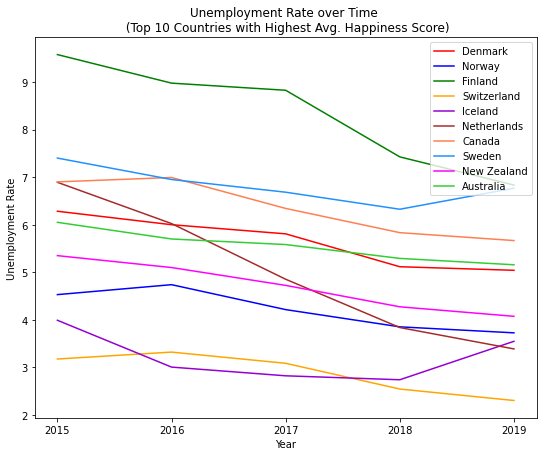

In [149]:
# Add labels to X and Y axes :: Add title
year = ['2015', '2016', '2017', '2018', '2019']
plt.title("Unemployment Rate over Time \n (Top 10 Countries with Highest Avg. Happiness Score)")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate")

# Plot the charts and apply some styling
country_1, = plt.plot(year, country_1_info, color="red", label= country_1_name)
country_2, = plt.plot(year, country_2_info, color="blue", label= country_2_name)
country_3, = plt.plot(year, country_3_info, color="green", label= country_3_name)
country_4, = plt.plot(year, country_4_info, color="orange", label= country_4_name)
country_5, = plt.plot(year, country_5_info, color= "darkviolet", label= country_5_name)
country_6, = plt.plot(year, country_6_info, color= "brown", label= country_6_name)
country_7, = plt.plot(year, country_7_info, color= "coral", label= country_7_name)
country_8, = plt.plot(year, country_8_info, color= "dodgerblue", label= country_8_name)
country_9, = plt.plot(year, country_9_info, color= "magenta", label= country_9_name)
country_10, = plt.plot(year, country_10_info, color= "limegreen", label= country_10_name)

# Create a legend for the chart
plt.legend(handles=[country_1, country_2, country_3, country_4, country_5,\
                    country_6, country_7, country_8, country_9, country_10], loc="best")

### Changes in Unemployment Rate (Bottom 10 Countries with Lowest Avg. Happiness Scores)

In [68]:
# Pull in average happiness data
bottom_happiness_file = "../Happiness/Resources/happiness_bottom10.csv"
bottom_happiness_df = pd.read_csv(bottom_happiness_file, encoding = "UTF-8")
bottom_happiness_df.head()

,Country,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Happiness Score_2019
0,Burundi,2.905,2.905,2.905,2.905,3.775
1,Syria,3.006,3.069,3.462,3.462,3.462
2,Rwanda,3.465,3.515,3.471,3.408,3.334
3,Tanzania,3.781,3.666,3.349,3.303,3.231
4,Afghanistan,3.575,3.360,3.794,3.632,3.203


In [69]:
# Merge DataFrames to get unemployment information for countries in happiness sample
bottom10_unemp_merged_df = bottom_happiness_df.merge(happiness_unemployment_df, how = 'inner', \
                                                   on = 'Country')
bottom10_unemp_merged_df

,Country,Happiness Score_2015_x,Happiness Score_2016_x,Happiness Score_2017_x,Happiness Score_2018_x,Happiness Score_2019_x,Happiness Score_2015_y,Happiness Score_2016_y,Happiness Score_2017_y,Happiness Score_2018_y,Happiness Score_2019_y,Avg Happiness,Unemp. Rate_2015,Unemp. Rate_2016,Unemp. Rate_2017,Unemp. Rate_2018,Unemp. Rate_2019,Avg. Unemployment
